<a href="https://colab.research.google.com/github/Jihyozhixiao/YBIGTA/blob/master/%EA%B9%80%EC%A7%80%ED%9A%A8_DL(MLP)_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 18기 DS 김승하님

In [ ]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

11501568/11490434 [==============================] - 0s 0us/step


## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [ ]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [ ]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

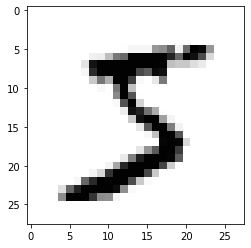

In [ ]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [ ]:
y_train.shape

(60000,)

In [ ]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [ ]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [ ]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(512, input_dim = 784, kernel_initializer = initializer_list[0], bias_initializer = 'zeros', activation = activation_list[0]),
                             tf.keras.layers.Dense(256, activation = activation_list[0], kernel_initializer=initializer_list[0]),
                             tf.keras.layers.Dense(64, activation = activation_list[0]),
                             tf.keras.layers.Dense(32),
                             tf.keras.layers.Dropout(0.3)
])
model.compile(optimizer=optimizer_list[0], loss=loss_list[0], metrics=['mean_absolute_error'])

내가 만든 모델을 확인해 봅시다.

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 512)               401920    
                                                                 
 dense_29 (Dense)            (None, 256)               131328    
                                                                 
 dense_30 (Dense)            (None, 64)                16448     
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
Total params: 551,776
Trainable params: 551,776
Non-trainable params: 0
_________________________________________________________________


model을 자유롭게 train 해봅시다.  

In [ ]:
model.fit(x_train, y_train,
          batch_size=128,
          epochs=100,
          validation_split = 0.2,
          verbose=1)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 12.2377 - mean_absolute_error: 4.5759 - val_loss: 10.1927 - val_mean_absolute_error: 4.5869
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 12.2647 - mean_absolute_error: 4.5784 - val_loss: 10.2267 - val_mean_absolute_error: 4.5941
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 12.1553 - mean_absolute_error: 4.5878 - val_loss: 10.0869 - val_mean_absolute_error: 4.6176
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 12.0463 - mean_absolute_error: 4.6071 - val_loss: 10.0950 - val_mean_absolute_error: 4.6213
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 11.9611 - mean_absolute_error: 4.6103 - val_loss: 10.0608 - val_mean_absolute_error: 4.6256
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 12.7537 - mean_absolute_error: 4.6663 - val_loss: 9.9751 - val_mean_absolute_error: 4.7724

95%이상의 성능을 가진 모델을 만들면 완성!

In [ ]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 1s - loss: 11.5518 - mean_absolute_error: 4.7505 - 560ms/epoch - 2ms/step

Accuracy: 4.7504730224609375


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)